In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADistanceMap, PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout
from src.Logger import Logger


In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"training_times": 1,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"classes_mode": False,
	"learning_rate": 1e-4,
	"site": "PA",
	"training_date": "current" # values: earlier, current
}
print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, 
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	if type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	if type(dataset) == MAMultipleDates:
		exp = 146		
else:

	exp = 10

logger = Logger()
trainer = TrainerMCDropout(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': False, 'learning_rate': 0.0001, 'site': 'PA', 'training_date': 'current'}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [7]:
exp

0

In [8]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:

trainer.getLabelCurrentDeforestation()

In [14]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [15]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

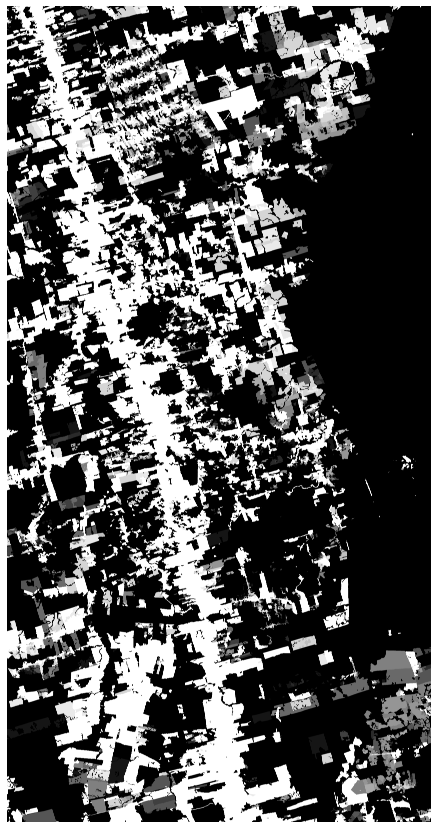

In [16]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [17]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [18]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [19]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [20]:
if config["training"] == True:
    trainer.extractCoords()

In [21]:
if config["training"] == True:
    trainer.trainTestSplit()

In [22]:
if config["training"] == True:
    trainer.label_mask.shape

In [23]:
if config["training"] == True:

    trainer.logger.plotFigure(trainer.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [24]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [25]:
if config["training"] == True:
    print(trainer.coords_train)

In [26]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [27]:
if config["training"] == True:
    inputSnipShow = True

In [28]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [29]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [30]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [31]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [32]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [33]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [34]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [35]:
if config["training"] == True:
    trainer.getGenerators()


In [36]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [37]:
if config["training"] == True:
    print(trainer.path_exp)

In [38]:
if config["training"] == True:
    print(trainer.channels)

In [39]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [40]:
if config["training"] == True:
    trainer.train()

In [41]:
if config["training"] == True:
    trainer.plotHistory()


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [44]:
trainer.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [45]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [46]:
trainer.image_stack.shape

(17730, 9200, 21)

In [47]:
trainer.setPadding()

-30.0 -16.0


In [48]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp0/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [49]:
trainer.loadPredictedProbabilities()

In [50]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [51]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [52]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [53]:
trainer.getMeanProb()

In [54]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 2.4456822e-17
    np.mean(value): 0.013660723
    np.max(value): 0.9938793


In [55]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [56]:
trainer.unpadMeanProb()

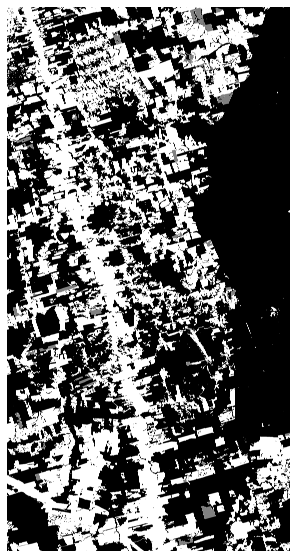

In [57]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [58]:
trainer.squeezeLabel()

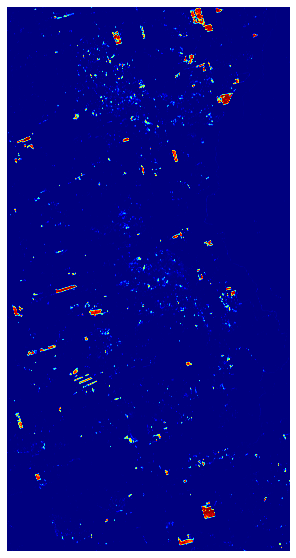

In [59]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [60]:
print(trainer.label_mask.shape)

(17730, 9200)


In [61]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [62]:
trainer.getMAP()

90.17


In [63]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [64]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 1)


In [65]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [66]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0
    np.mean(value): 0.013658893
    np.max(value): 0.99999


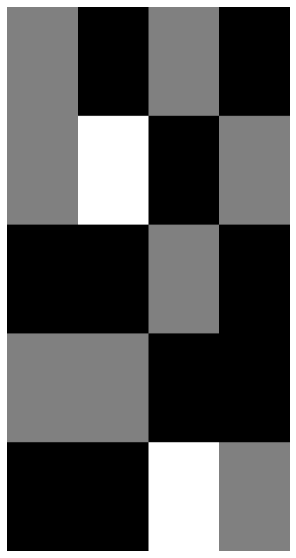

In [67]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [68]:
trainer.getLabelCurrentDeforestation()

In [69]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161295351,   1820649], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [70]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [71]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161295351,   1820649], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161461151,   1654849], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162950200,    165800], dtype=int64))


In [72]:
trainer.calculateMetrics()

ic| self.f1: 84.68, self.precision: 89.48, self.recall: 80.36


In [73]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9433713,)
ic| f1_val: 86.74
    precision_val: 84.62
    recall_val: 88.98
    mAP_val: 92.09


In [74]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [75]:
trainer.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [76]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162516069,    599931], dtype=int64))


In [77]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


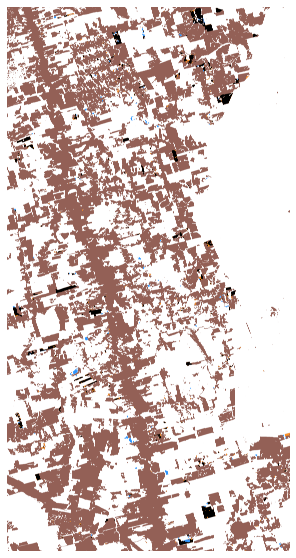

In [78]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [79]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [80]:
trainer.setUncertainty()

K = 1, pred_mean shape (17760, 9216, 1)


In [81]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [82]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.009210557
    np.max(value): 0.36787948


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

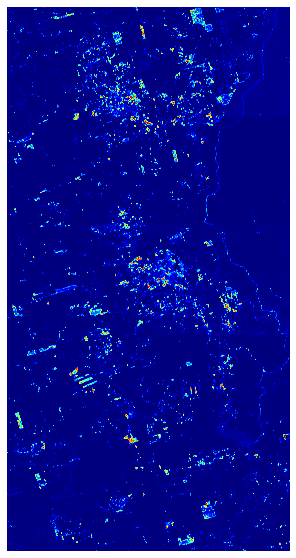

In [83]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



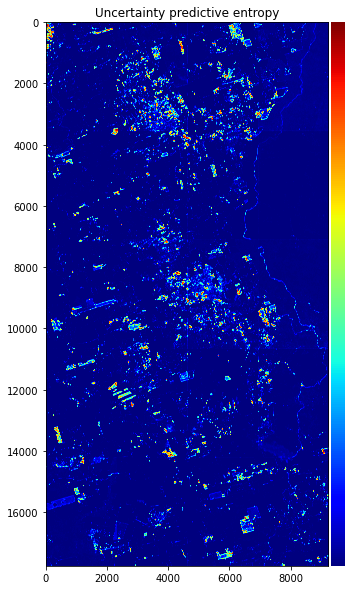

In [84]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [85]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54157779,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


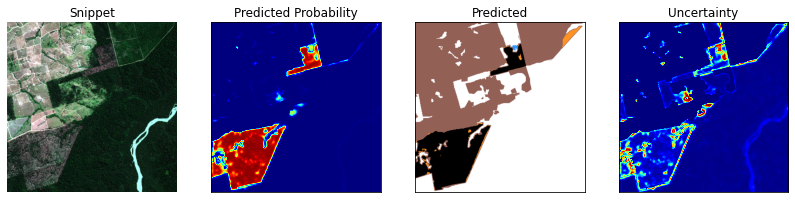

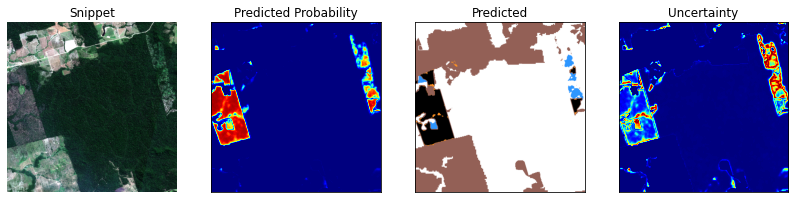

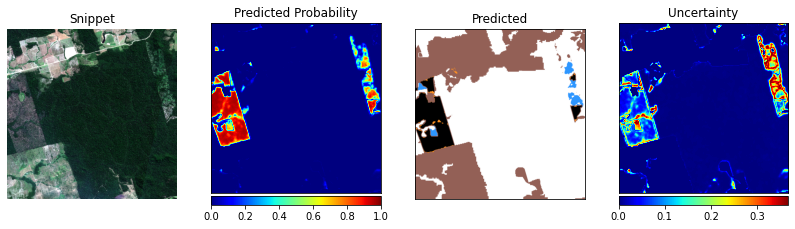

In [86]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


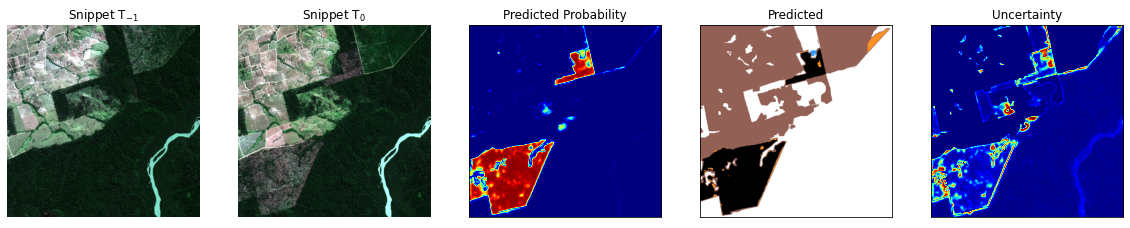

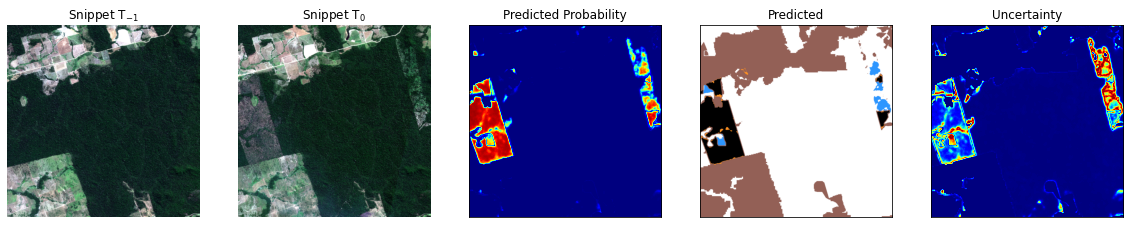

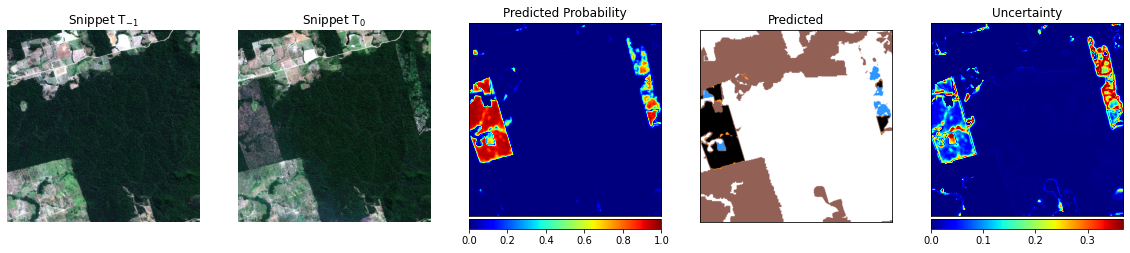

In [87]:
trainer.logger.plotCropSampleT0T1(trainer)

In [88]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [89]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [90]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 1.0355181e-10
    np.mean(value): 0.014069259
    np.max(value): 0.36787948


In [91]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

Get precision-recall threshold

In [92]:

trainer.getUncertaintyAAValues()

[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]


ic| self.uncertainty.shape: (54157779,)
    self.label_mask_current_deforestation_test.shape: (54157779,)


threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (19509936,)
    predicted_test_classified_incorrect.shape: (19509936,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 19509936
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 19509936
    len(label_mask_current_deforestation_test): 54157779


[       nan 0.         0.         0.36024254 0.89483586 0.80717654
 0.0107985 ]
threshold 0.005


ic| label_current_deforestation_test_classified_incorrect.shape: (12178153,)
    predicted_test_classified_incorrect.shape: (12178153,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 12178153
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 12178153
    len(label_mask_current_deforestation_test): 54157779


[       nan 0.         0.         0.22486434 0.89483586 0.80863717
 0.01718748]
threshold 0.0075


ic| label_current_deforestation_test_classified_incorrect.shape: (8858349,)
    predicted_test_classified_incorrect.shape: (8858349,)
ic| TP_H + FN_H + FP_H + TN_H: 8858349
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 8858349
    len(label_mask_current_deforestation_test): 54157779


[1.00000000e+00 5.42691751e-04 4.07789874e-06 1.63565589e-01
 8.94835384e-01 8.09711770e-01 2.35133081e-02]
threshold 0.01


ic| label_current_deforestation_test_classified_incorrect.shape: (7492078,)
    predicted_test_classified_incorrect.shape: (7492078,)
ic| TP_H + FN_H + FP_H + TN_H: 7492078
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 7492078
    len(label_mask_current_deforestation_test): 54157779


[1.00000000e+00 4.69314079e-02 4.24101469e-04 1.38337985e-01
 8.94786176e-01 8.10531875e-01 2.76869215e-02]
threshold 0.015


ic| label_current_deforestation_test_classified_incorrect.shape: (6249161,)
    predicted_test_classified_incorrect.shape: (6249161,)
ic| TP_H + FN_H + FP_H + TN_H: 6249161
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 6249161
    len(label_mask_current_deforestation_test): 54157779


[1.         0.54430602 0.01264964 0.11538806 0.89333344 0.80980161
 0.03294783]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (5020696,)
    predicted_test_classified_incorrect.shape: (5020696,)
ic| TP_H + FN_H + FP_H + TN_H: 5020696
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 5020696
    len(label_mask_current_deforestation_test): 54157779


[1.         0.8275543  0.06442944 0.09270498 0.88670813 0.80161174
 0.04056536]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (3532233,)
    predicted_test_classified_incorrect.shape: (3532233,)
ic| TP_H + FN_H + FP_H + TN_H: 3532233
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 3532233
    len(label_mask_current_deforestation_test): 54157779


[1.         0.90851958 0.1815698  0.06522116 0.86818626 0.77743367
 0.05654595]
threshold 0.08


ic| label_current_deforestation_test_classified_incorrect.shape: (2628894,)
    predicted_test_classified_incorrect.shape: (2628894,)
ic| TP_H + FN_H + FP_H + TN_H: 2628894
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 2628894
    len(label_mask_current_deforestation_test): 54157779


[0.99954646 0.9326356  0.32353641 0.04854139 0.8358292  0.73510815
 0.07431201]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (2214620,)
    predicted_test_classified_incorrect.shape: (2214620,)
ic| TP_H + FN_H + FP_H + TN_H: 2214620
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 2214620
    len(label_mask_current_deforestation_test): 54157779


[0.99759352 0.93825113 0.4090948  0.040892   0.80848456 0.69955604
 0.08653144]
threshold 0.15


ic| label_current_deforestation_test_classified_incorrect.shape: (1559170,)
    predicted_test_classified_incorrect.shape: (1559170,)
ic| TP_H + FN_H + FP_H + TN_H: 1559170
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1559170
    len(label_mask_current_deforestation_test): 54157779


[0.98981088 0.93801768 0.5441684  0.0287894  0.74492663 0.61795461
 0.11534562]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (1157905,)
    predicted_test_classified_incorrect.shape: (1157905,)
ic| TP_H + FN_H + FP_H + TN_H: 1157905
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1157905
    len(label_mask_current_deforestation_test): 54157779


[0.97609275 0.93132757 0.62779251 0.02138022 0.68981331 0.53952154
 0.14009883]
threshold 0.225


ic| label_current_deforestation_test_classified_incorrect.shape: (996434,)
    predicted_test_classified_incorrect.shape: (996434,)
ic| TP_H + FN_H + FP_H + TN_H: 996434
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 996434
    len(label_mask_current_deforestation_test): 54157779


[0.96499595 0.92717064 0.66282846 0.01839872 0.66666452 0.49386159
 0.1500848 ]
threshold 0.25


ic| label_current_deforestation_test_classified_incorrect.shape: (848818,)
    predicted_test_classified_incorrect.shape: (848818,)
ic| TP_H + FN_H + FP_H + TN_H: 848818
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 848818
    len(label_mask_current_deforestation_test): 54157779


[0.95305165 0.92258436 0.69544621 0.01567306 0.64253595 0.43942447
 0.15901596]
threshold 0.27


ic| label_current_deforestation_test_classified_incorrect.shape: (739369,)
    predicted_test_classified_incorrect.shape: (739369,)
ic| TP_H + FN_H + FP_H + TN_H: 739369
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 739369
    len(label_mask_current_deforestation_test): 54157779


[0.94348743 0.91812138 0.71977767 0.01365213 0.62028295 0.38815446
 0.16497924]
threshold 0.3


ic| label_current_deforestation_test_classified_incorrect.shape: (579878,)
    predicted_test_classified_incorrect.shape: (579878,)
ic| TP_H + FN_H + FP_H + TN_H: 579878
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 579878
    len(label_mask_current_deforestation_test): 54157779


[0.92769145 0.90982974 0.75447651 0.0107072  0.57970503 0.28787734
 0.17056993]
threshold 0.34


ic| label_current_deforestation_test_classified_incorrect.shape: (354859,)
    predicted_test_classified_incorrect.shape: (354859,)
ic| TP_H + FN_H + FP_H + TN_H: 354859
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 354859
    len(label_mask_current_deforestation_test): 54157779


[0.89959711 0.89224736 0.79672354 0.00655232 0.55565274 0.06452432
 0.1583167 ]
threshold 0.36


ic| label_current_deforestation_test_classified_incorrect.shape: (185450,)
    predicted_test_classified_incorrect.shape: (185450,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 185450
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 185450
    len(label_mask_current_deforestation_test): 54157779


[0.89483586 0.85136624 0.8036315  0.00342425        nan 0.
 0.11517091]
threshold 0.3648794801235199


ic| label_current_deforestation_test_classified_incorrect.shape: (113382,)
    predicted_test_classified_incorrect.shape: (113382,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 113382
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 113382
    len(label_mask_current_deforestation_test): 54157779


[0.89483586 0.83218848 0.8036315  0.00209355        nan 0.
 0.0835703 ]
threshold 0.3663794801235199


ic| label_current_deforestation_test_classified_incorrect.shape: (79913,)
    predicted_test_classified_incorrect.shape: (79913,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 79913
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 79913
    len(label_mask_current_deforestation_test): 54157779


[0.89483586 0.823613   0.8036315  0.00147556        nan 0.
 0.06466456]


In [93]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54157779,)
    self.label_mask_current_deforestation_test.shape: (54157779,)


threshold 0.0025
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [    3231   732442]]
[1.        0.9956081]
threshold 0.005
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [    4554   731119]]
[1.         0.99380975]
threshold 0.0075
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [    5525   730148]]
[1.         0.99248987]
threshold 0.01
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [    6336   729337]]
[1.         0.99138748]
threshold 0.015
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [    7791   727882]]
[1.        0.9894097]
threshold 0.025
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [    9877   725796]]
[1.        0.9865742]
threshold 0.05
(54157779,) (54157779,)
cm_audited [[53422106        0]
 [   13450   722223]]
[1.         0.98171742]
threshold 0.08
(54157779,) (54157779,)
cm_audited [[53421998      108]
 [   17192   718481]]
[0.99984971 0.97663092]
threshold 0.1
(54157779,) (54157779,)
cm_audited [[53421380    

ic| metric_values_audited: array([[1.        , 0.9956081 ],
                                  [1.        , 0.99380975],
                                  [1.        , 0.99248987],
                                  [1.        , 0.99138748],
                                  [1.        , 0.9894097 ],
                                  [1.        , 0.9865742 ],
                                  [1.        , 0.98171742],
                                  [0.99984971, 0.97663092],
                                  [0.99898687, 0.97307635],
                                  [0.99422296, 0.96404245],
                                  [0.98413308, 0.95370905],
                                  [0.97526355, 0.94793475],
                                  [0.96489564, 0.94164391],
                                  [0.95595883, 0.9358098 ],
                                  [0.94023845, 0.92522629],
                                  [0.91042522, 0.90378334],
                                  [0.901

cm_audited [[53352625    69481]
 [  126615   609058]]
[0.89760205 0.82789228]


In [94]:
trainer.setPlotLimsForUncertaintyAA()

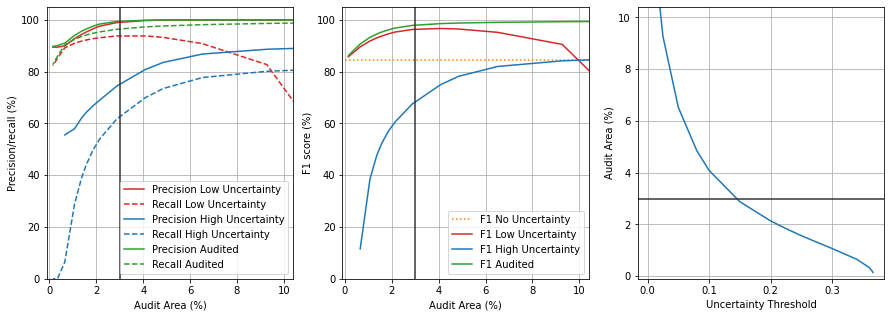

In [95]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA(normalize_xlim=False)

In [96]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.3663794801235199)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| label_current_deforestation_test_classified_incorrect.shape: (1651641,)
    predicted_test_classified_incorrect.shape: (1651641,)
ic| TP_H + FN_H + FP_H + TN_H: 1651641
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1651641
    len(label_mask_current_deforestation_test): 54157779


[0.99177005 0.93899501 0.52548891 0.03049684 0.7553554  0.63160981
 0.1104904 ]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (983926,)
    predicted_test_classified_incorrect.shape: (983926,)
ic| TP_H + FN_H + FP_H + TN_H: 983926
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 983926
    len(label_mask_current_deforestation_test): 54157779


[0.96397579 0.92688148 0.66560143 0.01816777 0.66487916 0.48965667
 0.15085416]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (2456516,)
    predicted_test_classified_incorrect.shape: (2456516,)
ic| TP_H + FN_H + FP_H + TN_H: 2456516
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 2456516
    len(label_mask_current_deforestation_test): 54157779


[0.99910964 0.93535584 0.35845138 0.04535851 0.82546824 0.72178647
 0.0789842 ]
0.16161443443243204
threshold 0.16161443443243204


ic| label_current_deforestation_test_classified_incorrect.shape: (1451255,)
    predicted_test_classified_incorrect.shape: (1451255,)
ic| TP_H + FN_H + FP_H + TN_H: 1451255
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1451255
    len(label_mask_current_deforestation_test): 54157779


[0.98670685 0.93664554 0.56602866 0.0267968  0.73238669 0.60048438
 0.12132272]
0.12053752310200923
threshold 0.12053752310200923


ic| label_current_deforestation_test_classified_incorrect.shape: (1894060,)
    predicted_test_classified_incorrect.shape: (1894060,)
ic| TP_H + FN_H + FP_H + TN_H: 1894060
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1894060
    len(label_mask_current_deforestation_test): 54157779


[0.99504394 0.93988197 0.47541095 0.034973   0.78092315 0.66417186
 0.09896448]
0.1435999074010418
threshold 0.1435999074010418


ic| label_current_deforestation_test_classified_incorrect.shape: (1623138,)
    predicted_test_classified_incorrect.shape: (1623138,)
ic| TP_H + FN_H + FP_H + TN_H: 1623138
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1623138
    len(label_mask_current_deforestation_test): 54157779


[0.9911781  0.93874364 0.53117078 0.02997054 0.75228284 0.62754613
 0.1119577 ]
0.1473487457292753
threshold 0.1473487457292753


ic| label_current_deforestation_test_classified_incorrect.shape: (1585247,)
    predicted_test_classified_incorrect.shape: (1585247,)
ic| TP_H + FN_H + FP_H + TN_H: 1585247
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1585247
    len(label_mask_current_deforestation_test): 54157779


[0.99044736 0.93835038 0.53894053 0.0292709  0.74784452 0.62184965
 0.11396738]
0.14378570585021902
threshold 0.14378570585021902


ic| label_current_deforestation_test_classified_incorrect.shape: (1621245,)
    predicted_test_classified_incorrect.shape: (1621245,)
ic| TP_H + FN_H + FP_H + TN_H: 1621245
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1621245
    len(label_mask_current_deforestation_test): 54157779


[0.99113669 0.93873117 0.53155546 0.02993559 0.75207313 0.62726301
 0.11205715]
0.1429301765157466
threshold 0.1429301765157466


ic| label_current_deforestation_test_classified_incorrect.shape: (1629997,)
    predicted_test_classified_incorrect.shape: (1629997,)
ic| TP_H + FN_H + FP_H + TN_H: 1629997
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1629997
    len(label_mask_current_deforestation_test): 54157779


[0.99133732 0.93884812 0.52982099 0.03009719 0.75299989 0.62848273
 0.11161744]
0.1433440929661746
threshold 0.1433440929661746


ic| label_current_deforestation_test_classified_incorrect.shape: (1625802,)
    predicted_test_classified_incorrect.shape: (1625802,)
ic| TP_H + FN_H + FP_H + TN_H: 1625802
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1625802
    len(label_mask_current_deforestation_test): 54157779


[0.99124043 0.93877595 0.53067735 0.03001973 0.75254089 0.62789432
 0.11182181]
0.14341607272453383
threshold 0.14341607272453383


ic| label_current_deforestation_test_classified_incorrect.shape: (1625022,)
    predicted_test_classified_incorrect.shape: (1625022,)
ic| TP_H + FN_H + FP_H + TN_H: 1625022
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1625022
    len(label_mask_current_deforestation_test): 54157779


[0.99122787 0.93876565 0.53083231 0.03000533 0.75245205 0.6277852
 0.11186244]
0.14345732335664033
threshold 0.14345732335664033


ic| label_current_deforestation_test_classified_incorrect.shape: (1624633,)
    predicted_test_classified_incorrect.shape: (1624633,)
ic| TP_H + FN_H + FP_H + TN_H: 1624633
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1624633
    len(label_mask_current_deforestation_test): 54157779


[0.9912114  0.93875285 0.53090164 0.02999815 0.75242445 0.62774348
 0.111878  ]
0.14349065881778963
threshold 0.14349065881778963


ic| label_current_deforestation_test_classified_incorrect.shape: (1624276,)
    predicted_test_classified_incorrect.shape: (1624276,)
ic| TP_H + FN_H + FP_H + TN_H: 1624276
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1624276
    len(label_mask_current_deforestation_test): 54157779
ic| self.threshold_optimal: 0.14345732335664033


[0.9912049  0.93875525 0.53096552 0.02999155 0.75238928 0.62769266
 0.1118988 ]


In [97]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.14345732335664033


ic| label_current_deforestation_test_classified_incorrect.shape: (1624633,)
    predicted_test_classified_incorrect.shape: (1624633,)
ic| TP_H + FN_H + FP_H + TN_H: 1624633
    len(label_mask_current_deforestation_test): 54157779
ic| TP_H + FN_H + FP_H + TN_H: 1624633
    len(label_mask_current_deforestation_test): 54157779


[0.9912114  0.93875285 0.53090164 0.02999815 0.75242445 0.62774348
 0.111878  ]
threshold 0.14345732335664033
(54157779,) (54157779,)


ic| self.m_optimal: {'AA': array([0.02999815]),
                     'UEO': array([0.111878]),
                     'f1': 84.68,
                     'f1_H': array([0.68445228]),
                     'f1_L': array([0.96426918]),
                     'precision_H': array([0.75242445]),
                     'precision_L': array([0.9912114]),
                     'recall_H': array([0.62774348]),
                     'recall_L': array([0.93875285]),
                     'recall_Ltotal': array([0.53090164])}
ic| self.m_audited_optimal: {'f1': array([0.98002866]),
                             'precision': array([0.99514751]),
                             'recall': array([0.96536233])}


cm_audited [[53418643     3463]
 [   25482   710191]]
[0.99514751 0.96536233]


{'metrics': {'precision_L': array([0.9912114]),
  'recall_L': array([0.93875285]),
  'recall_Ltotal': array([0.53090164]),
  'AA': array([0.02999815]),
  'precision_H': array([0.75242445]),
  'recall_H': array([0.62774348]),
  'UEO': array([0.111878]),
  'f1_L': array([0.96426918]),
  'f1_H': array([0.68445228]),
  'f1': 84.68},
 'metrics_audited': {'precision': array([0.99514751]),
  'recall': array([0.96536233]),
  'f1': array([0.98002866])},
 'exp': 0}